In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'C:\Users\smoks\Downloads\Loan Prediction Dataset.csv')
df.head() 

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.shape

(614, 13)

In [4]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [12]:
# Fill missing values
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean(), inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mean(), inplace=True)
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)

In [9]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [13]:
# Label encode all object (categorical) columns
le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])

In [15]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [16]:
x=df[['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area']]

In [17]:
x

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2
1,1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0
2,2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2
3,3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2
4,4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0
610,610,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0
611,611,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2
612,612,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2


In [18]:
y=df['Loan_Status']

In [19]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int32

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1)

In [21]:
x_train.shape

(552, 12)

In [22]:
x_test.shape

(62, 12)

In [23]:
y_train.shape

(552,)

In [24]:
y_test.shape

(62,)

In [55]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.7258064516129032


In [30]:
from sklearn.metrics import r2_score
from sklearn import tree
reg1= tree.DecisionTreeRegressor()
reg1.fit(x_train, y_train)
y_pred = reg1.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.6935483870967742


In [33]:
from sklearn.linear_model import LogisticRegression
model1= LogisticRegression(max_iter=1000)
model1.fit(x_train, y_train)
y_pred = model1.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.7096774193548387


In [57]:
prediction = model.predict([[0, 1, 0, 0, 0, 0, 5849, 0.0, 146.41, 360.0, 1.0, 2]])

In [58]:
print(prediction)

[1]


In [59]:
prediction = reg1.predict([[1, 1, 1, 1, 0, 0, 4583, 1508.0, 128.0, 360.0, 1.0, 0]])

In [60]:
print(prediction)

[0.]


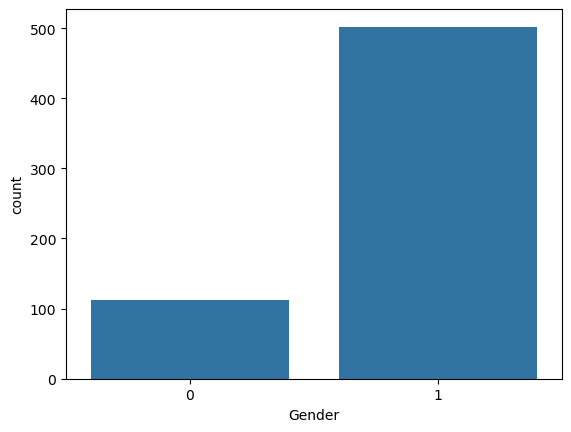

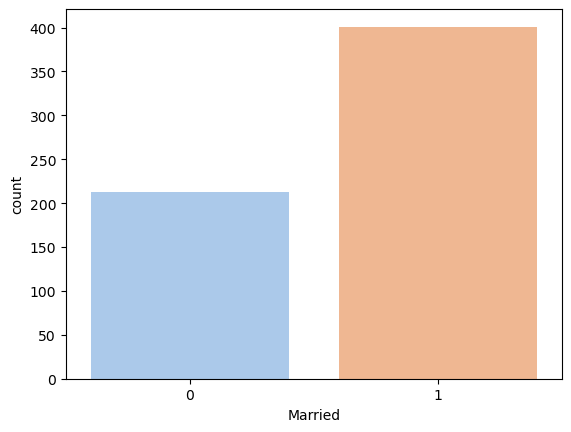

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='Gender', data=df)
plt.show()

sns.countplot(x='Married', data=df,palette='pastel')
plt.show()


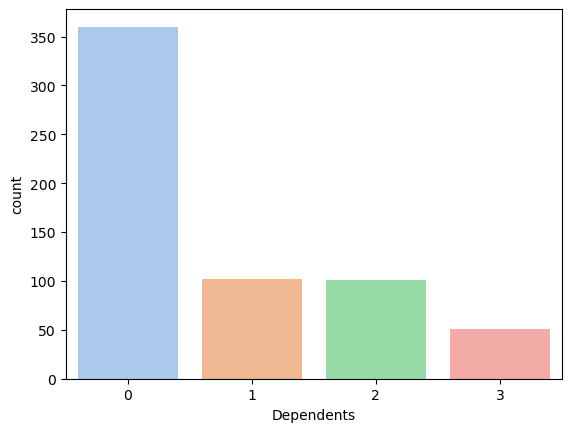

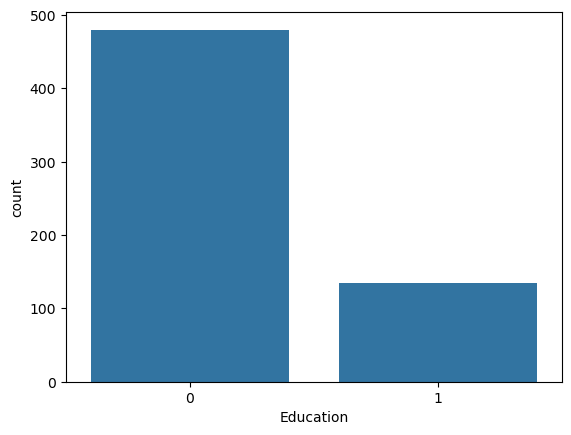

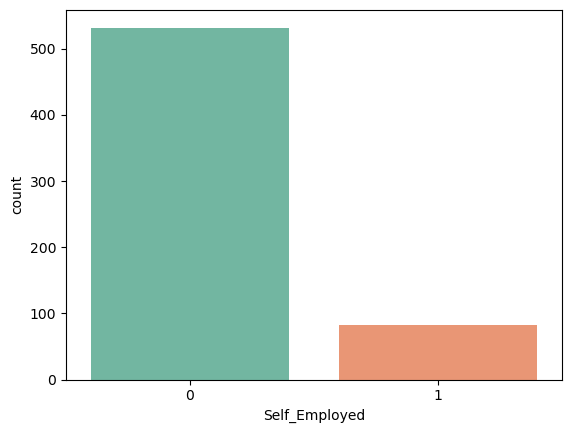

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='Dependents', data=df,palette='pastel')
plt.show()

sns.countplot(x='Education', data=df)
plt.show()
  
sns.countplot(x='Self_Employed', data=df,palette='Set2')
plt.show()

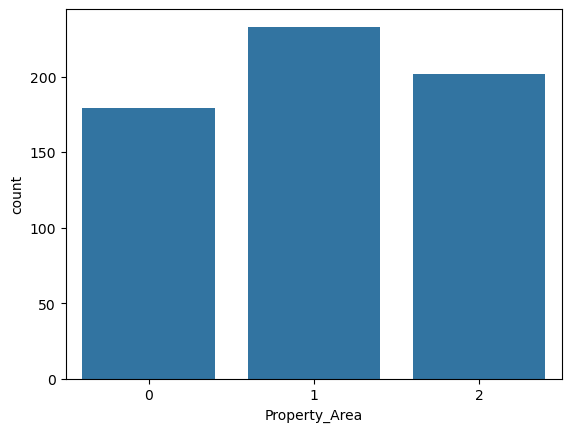

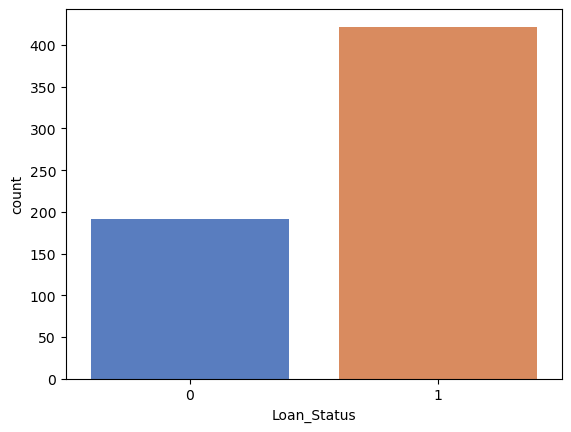

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Property_Area', data=df)
plt.show()

sns.countplot(x='Loan_Status', data=df,palette='muted')
plt.show()

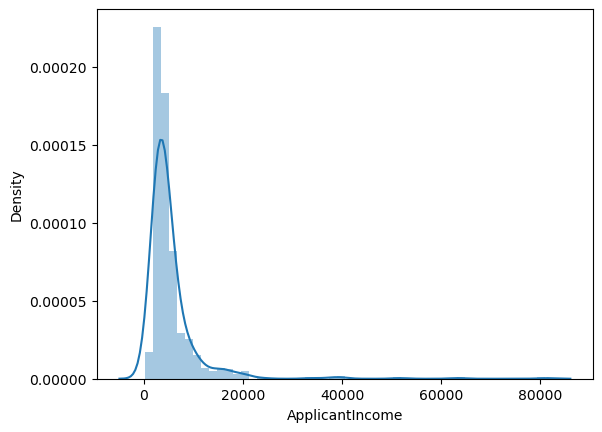

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(df["ApplicantIncome"])
plt.show()

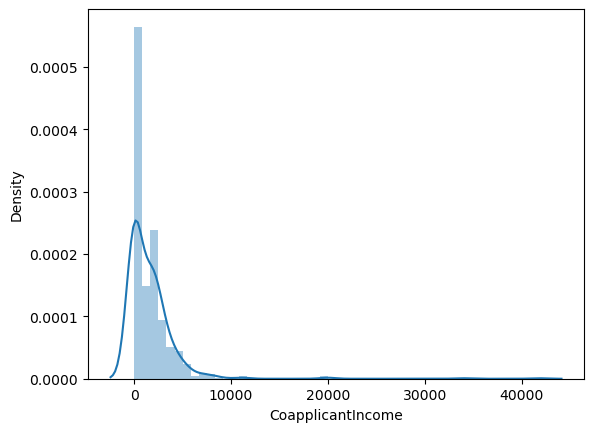

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(df["CoapplicantIncome"])
plt.show()

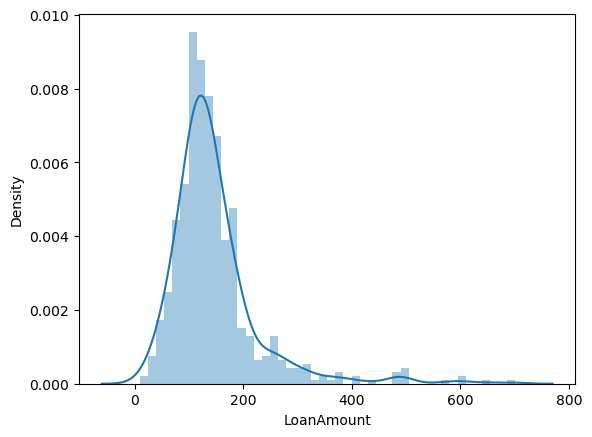

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(df["LoanAmount"])
plt.show()

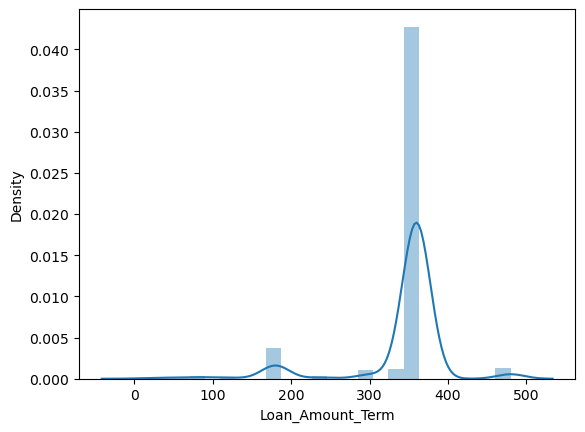

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(df['Loan_Amount_Term'])
plt.show()

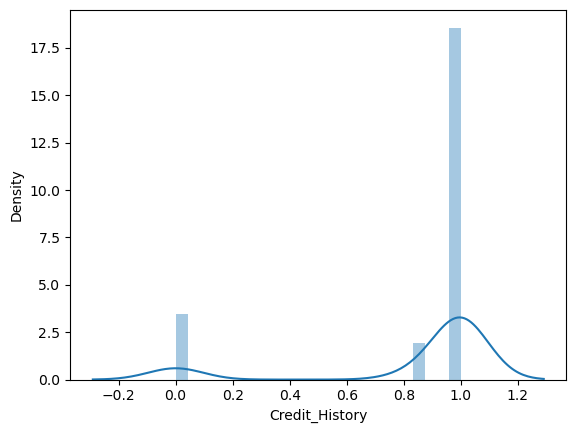

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(df['Credit_History'])
plt.show()

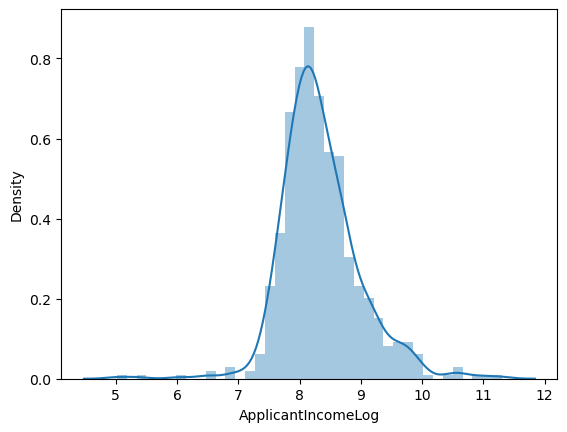

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
df['ApplicantIncomeLog'] = np.log(df['ApplicantIncome']+1)
sns.distplot(df["ApplicantIncomeLog"])
plt.show()

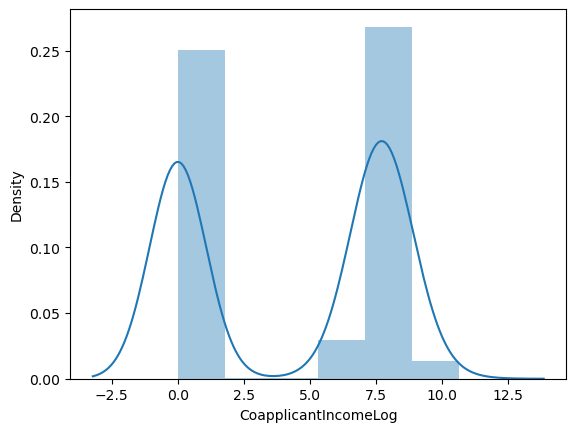

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
df['CoapplicantIncomeLog'] = np.log(df['CoapplicantIncome']+1)
sns.distplot(df["CoapplicantIncomeLog"])
plt.show()

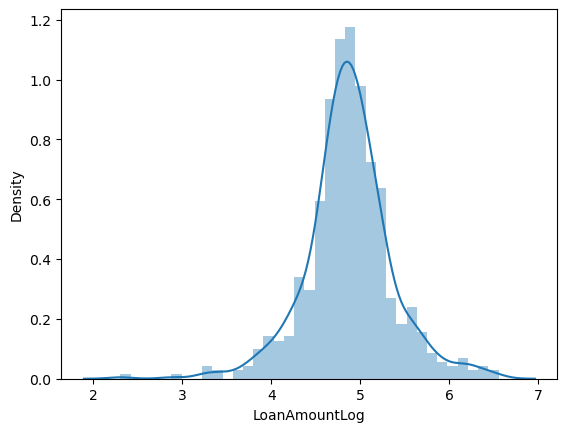

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
df['LoanAmountLog'] = np.log(df['LoanAmount']+1)
sns.distplot(df["LoanAmountLog"])
plt.show()

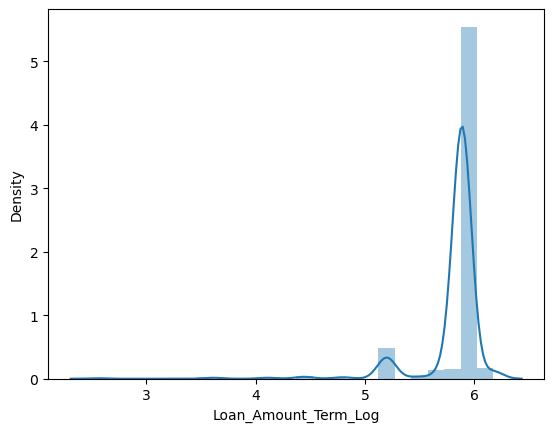

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
df['Loan_Amount_Term_Log'] = np.log(df['Loan_Amount_Term']+1)
sns.distplot(df["Loan_Amount_Term_Log"])
plt.show()

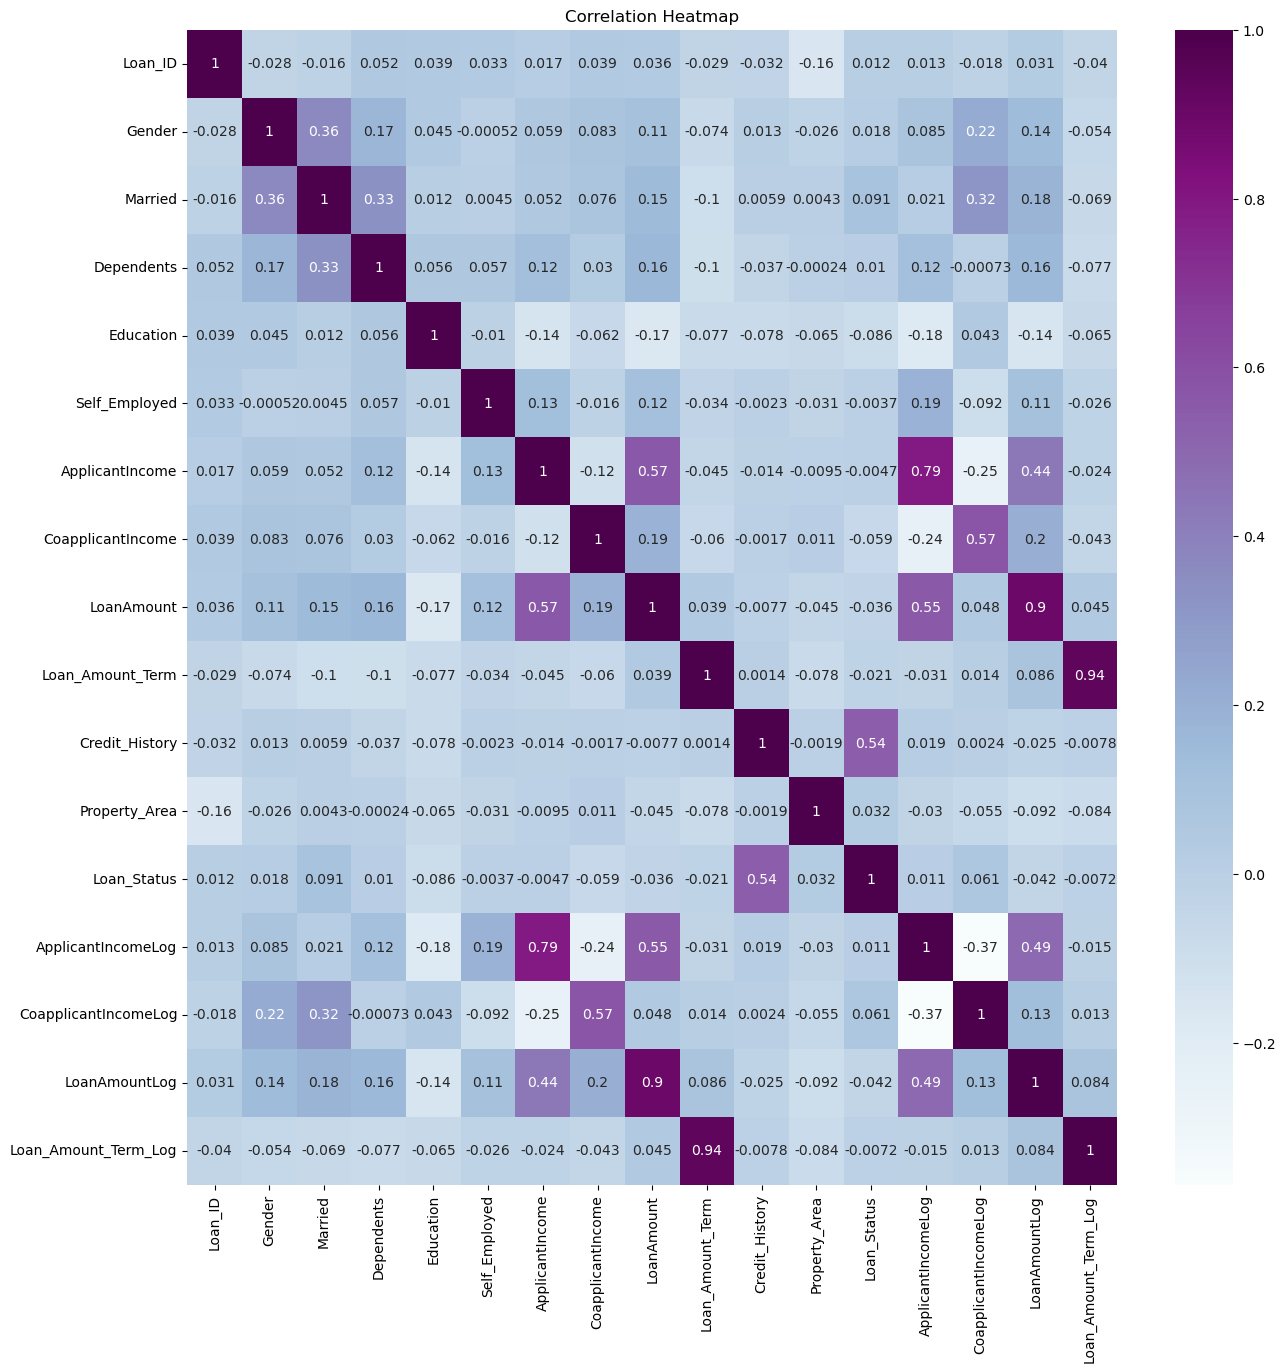

In [48]:
corr = df.corr(numeric_only=True)
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,15))
sns.heatmap(corr, annot=True, cmap="BuPu")
plt.title("Correlation Heatmap")
plt.show()

In [61]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 9, 16],
       [ 1, 36]], dtype=int64)

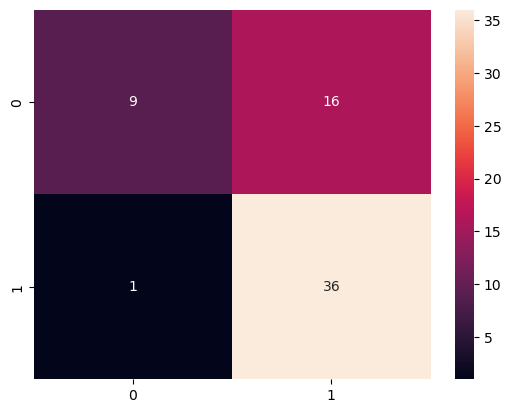

In [62]:
sns.heatmap(cm, annot=True)
plt.show()

In [63]:
import pickle

In [64]:
with open('loan_prediction.pkl', 'wb') as file:
    pickle.dump(model, file)